# Étude sur le clustering de la consommation électrique d'un bâtiment du secteur ternaire, bureaux
## Contexte

Dans le cadre de la transition énergétique des villes, Efficacity, un institut de recherche et développement dédié à la transition énergétique urbaine, développe plusieurs logiciels de simulation. Ces outils sont conçus pour aider à la prise de décision dans les projets d'aménagement urbain en prenant en compte la valorisation des énergies renouvelables et de récupération, ainsi que le choix des systèmes énergétiques en fonction des besoins spécifiques des bâtiments.

Un aspect crucial de ces logiciels est la détermination des besoins énergétiques des bâtiments. À cette fin, une base de données de profils de besoins énergétiques a été créée. Cette base de données est essentielle pour les simulations à l'échelle d'un quartier. Initialement, un échantillon représentatif des bâtiments français a été créé en classifiant les bâtiments par typologie. Les bâtiments sélectionnés ont ensuite été simulés à l'aide du logiciel DIMOSIM, spécialisé dans la simulation énergétique urbaine, afin de calculer leurs profils de besoins énergétiques. Cette base de données est constamment enrichie et mise à jour.

Pour cette étude, nous allons etudier la consommation d'éléctricité pour un des 389 bâtiments du secteur tertiare (bureau).

## Recuperation de la data et conversion la data dans un format que nous pouvons manipuler facilement (sans changer la data elle-même)

In [81]:
from helpers.get_data_consumation import get_Df_for_building

# building_id = "BATIMENT0000000240296739"
# building_id = "BATIMENT0000000000449256"
building_id = "BATIMENT0000000240777665"

# building_id = "BATIMENT0000000240289639"

consommation_type = "bureau_electricity"

data_consommation_hour_for_building = get_Df_for_building(
    building_id, consommation_type
)
data_consommation_hour_for_building

c:\ProgramData\Miniconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Datetime,electricity
0,2019-01-01 00:00:00+01:00,0.051205
1,2019-01-01 01:00:00+01:00,0.047232
2,2019-01-01 02:00:00+01:00,0.047482
3,2019-01-01 03:00:00+01:00,0.047517
4,2019-01-01 04:00:00+01:00,0.050697
...,...,...
8755,2019-12-31 19:00:00+01:00,3.440564
8756,2019-12-31 20:00:00+01:00,3.389798
8757,2019-12-31 21:00:00+01:00,0.513952
8758,2019-12-31 22:00:00+01:00,0.504356


Vérification de la taille et le type de la data

In [82]:
data_consommation_hour_for_building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datetime     8760 non-null   object 
 1   electricity  8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [83]:
data_consommation_hour_for_building.describe()

,electricity
count,8760.000000
mean,1.821979
std,1.681863
min,0.007467
25%,0.327235
50%,1.465605
75%,3.677617
max,4.835091



Nous allons convertir la collonne "Datetime" en format Timestamp et setter comme index cette colonne

##

In [84]:
data = data_consommation_hour_for_building.copy()

data["Datetime"] = data["Datetime"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M"))

# Set the "Datetime" column as the index of the DataFrame
df_to_show = data.set_index("Datetime")

df_to_show

,electricity
Datetime,
2019-01-01 00:00,0.051205
2019-01-01 01:00,0.047232
2019-01-01 02:00,0.047482
2019-01-01 03:00,0.047517
2019-01-01 04:00,0.050697
...,...
2019-12-31 19:00,3.440564
2019-12-31 20:00,3.389798
2019-12-31 21:00,0.513952


## Visualisation de la data


#### Visualisation de la consommation d'éléctricité sur toute l'année (chaque heure sur une année)

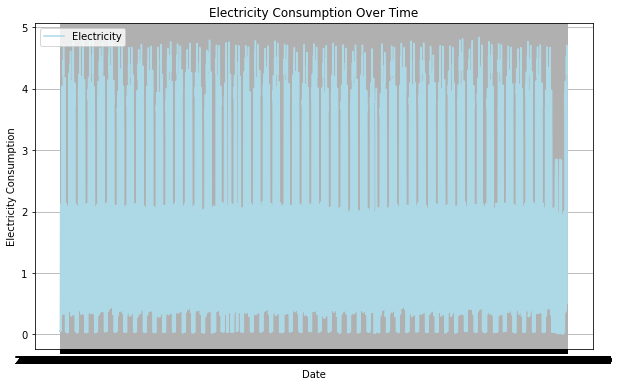

In [85]:
import matplotlib.pyplot as plt
import pandas as pd


# Configurer le graphique
plt.figure(figsize=(10, 6))
plt.plot(df_to_show.index, df_to_show["electricity"], label="Electricity", color="lightblue")
plt.title("Electricity Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

#### Visualisation de la consommation d'éléctricité sur une periode de l'année (chaque heure sur une periode specifié)

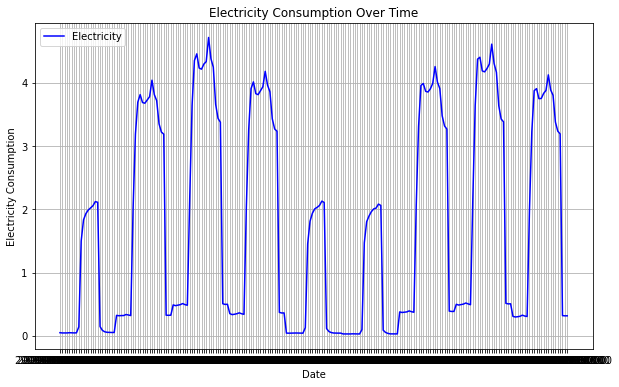

In [86]:
# Spécifier vos dates de début et de fin
start_date = "2019-01-01"
end_date = "2019-01-10"

# Filtrer le DataFrame en fonction de la plage de dates
df_filtered = df_to_show.loc[start_date:end_date]

# Configurer le graphique
plt.figure(figsize=(10, 6))
plt.plot(
    df_filtered.index, df_filtered["electricity"], label="Electricity", color="blue"
)
plt.title("Electricity Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

#### Visualisation de la consommation d'éléctricité sur toute l'année (chaque jour sur une année)

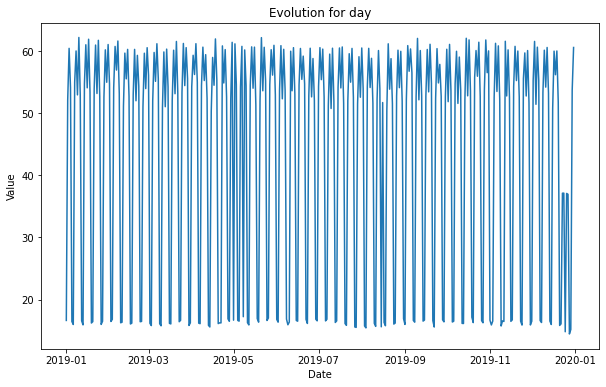

In [87]:
# Create a copy of df_to_show DataFrame to avoid modifying the original data
df_to_show_day = df_to_show.copy()

df_to_show.index=pd.to_datetime(df_to_show.index)
# Extract the date component from the index and add it as a new "date" column
df_to_show_day["date"] = df_to_show.index.date

# Group the DataFrame by date and calculate the sum of each column for each date
df_to_show_day = df_to_show_day.groupby(["date"]).sum()

# Reset the index to make "date" a regular column again
df_to_show_day = df_to_show_day.reset_index()

# Set the figure size to 10x6 inches
plt.figure(figsize=(10, 6))


plt.plot(df_to_show_day.date, df_to_show_day['electricity'])

# Add legends and axis labels
plt.title("Evolution for day")
plt.xlabel("Date")
plt.ylabel("Value")

# Uncomment the line below if you want to display legends for each building
# plt.legend()

# Display the plot
plt.show()

## Parcourir la data pour recuperer les nulls or les NaN

In [88]:
nan_count = data_consommation_hour_for_building.isna().sum().sum()
print("Nombre total de NaN dans le DataFrame : {}".format(nan_count))

null_count = data_consommation_hour_for_building.isnull().sum().sum()
print("Nombre total de null dans le DataFrame : {}".format(null_count))

Nombre total de NaN dans le DataFrame : 0
Nombre total de null dans le DataFrame : 0


In [89]:
from helpers.get_data_from_user import get_data_for_building
from helpers.get_data_consumation import get_excel_file_data


def get_data_for_building(id):
    buildings = get_excel_file_data("BU_all_buildings_IDF.xlsx")

    # Soustraire la ligne avec l'ID spécifié
    row_to_subtract = buildings.index[buildings["ID"] == id]
    print("row_to_subtract", row_to_subtract)

    # Soustraire la ligne de 'row_to_subtract' du DataFrame original 'df'
    df_subtracted = buildings.loc[row_to_subtract]

    # Afficher le DataFrame après la suppression
    return df_subtracted


building_data = get_data_for_building(building_id)

print(building_data.head())
print(building_data.columns)

row_to_subtract Int64Index([42], dtype='int64')
                          ID  bou  caf  chauf   ecr  mfd  pcf2e  port1e  \
42  BATIMENT0000000240777665  433  480      0  1429  294    980     917   

    nb_equip  nb_equip_bureau  ...  Pmax_cl_par_m2  annuel_el_par_m2  \
42      4533             3620  ...       55.381831          15.96054   

    Pmax_el_par_m2  annee_construction  effectif  nb_equip_par_m2  \
42        4.835091              2010.0    1784.0         0.103478   

    nb_equip_bureau_par_m2 nb_equip_autre_par_m2  bd_surface_par_occ  \
42                0.082637              0.020842           24.555078   

    hbs_surface_par_occ  
42            18.891256  

[1 rows x 42 columns]
Index(['ID', 'bou', 'caf', 'chauf', 'ecr', 'mfd', 'pcf2e', 'port1e',
       'nb_equip', 'nb_equip_bureau', 'nb_equip_autre', 'height',
       'floor_count', 'ExteriorWall_U_value', 'ExteriorRoof_U_value',
       'ExteriorFloor_U_value', 'ExteriorWall_window_share',
       'ExteriorWall_window_typ

Le bureau etudié, identifié sous l'ID BATIMENT0000000240777665, a été construit en 2010 et est équipé de 433 bureaus, 1429 écrans, 294 systèmes multifonctionnels, et 917 portes. Le chauffage est assuré sans utilisation de combustibles, et le bâtiment est caractérisé par une performance énergétique élevée, avec une consommation annuelle de 55.38 kWh/m² pour le refroidissement. La capacité électrique maximale par mètre carré est de 4.84 kW, et la consommation annuelle d'électricité par mètre carré est de 15.96 kWh. Avec une superficie totale de 980 m², le bâtiment accueille un effectif de 1784 personnes, avec une densité d'équipement de 0.10 équipement par mètre carré. Les bureaux sont particulièrement bien équipés, avec 0.08 équipement par mètre carré. La surface de bureau par occupant est de 24.56 m², et la surface habitable par occupant est de 18.89 m².

## Gerer le changement d'heure (fin mars et fin octobre)

Fin mars : un jour avec une valeur manquante

Deux approches sont envisageables :
1.	Reconstruire les données manquantes.
2.	Supprimer le profil contenant des données manquantes.

Étant donné la faible variation horaire dans notre jeu de données et le fait que nous ne reconstruirons qu'un seul point sur l'ensemble de l'année, nous pouvons considérer que toute incertitude introduite par la reconstruction est totalement négligeable. Une autre raison de reconstruire le profil manquant est le risque de supprimer un profil essentiel, notamment un profil spécifique notablement différent des autres, ce qui pourrait affecter les résultats de la classification.

Pour la reconstruction, nous allons utiliser la méthode consistant à prendre la moyenne des valeurs précédant et suivant le point manquant.

 Nous allons également vérifier plusieurs cas pour évaluer si la valeur de cette heure pour les jours précédents de la même semaine diffère considérablement. Nous examinerons également un échantillon d'autres profils similaires pour garantir qu'il n'y a pas de variations significatives des valeurs au point de données que nous souhaitons reconstruire (à la même heure sur d'autres jours).

Cela nous permettra de nous assurer que les données reconstruites seront relativement fiables et que toute erreur introduite dans l'ensemble de données sera négligeable.

Fin octobre : un jour avec une heure supplémentaire

Nous avons le choix entre deux approches :
1.	Supprimer une heure et conserver 24 heures, ce qui équivaut à une journée complète.
2.	Éliminer le profil contenant des données manquantes


Nous avons opté pour la première méthode en supprimant une des deux valeurs correspondant à la même date et à la même heure. Cette décision a été motivée par la nécessité d'éviter tout risque de suppression d'un profil essentiel, notamment d'un profil spécifique distinct des autres, susceptible d'influer sur les résultats de la classification.
Étant donné que notre ensemble de données ne présente qu'un seul cas de ce type, la suppression d'une seule valeur, bien que pouvant introduire une certaine incertitude, reste négligeable au regard de l'ensemble des données.


In [90]:
from helpers.manage_hour_changes import manage_hour_changes

data_consommation_hour_for_building_with_hours_changes_managed = manage_hour_changes(
    data_consommation_hour_for_building
)
print(data_consommation_hour_for_building_with_hours_changes_managed)

Indices of hour changes:
Int64Index([2138], dtype='int64')
                Datetime  electricity
2133 2019-03-30 21:00:00     0.030327
2134 2019-03-30 22:00:00     0.029766
2135 2019-03-30 23:00:00     0.030067
2136 2019-03-31 00:00:00     0.033938
2137 2019-03-31 01:00:00     0.034140
2138 2019-03-31 02:00:00     0.034286
2139 2019-03-31 03:00:00     0.034052
2140 2019-03-31 04:00:00     0.034431
2141 2019-03-31 05:00:00     0.035847
2142 2019-03-31 06:00:00     0.034877
Les lignes qui sont duppliquées :
                Datetime  electricity
7178 2019-10-27 02:00:00     0.034399
7179 2019-10-27 02:00:00     0.035444
                Datetime  electricity
0    2019-01-01 00:00:00     0.051205
1    2019-01-01 01:00:00     0.047232
2    2019-01-01 02:00:00     0.047482
3    2019-01-01 03:00:00     0.047517
4    2019-01-01 04:00:00     0.050697
...                  ...          ...
8756 2019-12-31 19:00:00     3.440564
8757 2019-12-31 20:00:00     3.389798
8758 2019-12-31 21:00:00     0.51

La fonction suivante (make_day_profil) retourne un nouveau DataFrame qui représente les profils de consommation d'électricité pour chaque jour de l'année, organisés par heures.

In [91]:
from helpers.make_day_profil import make_day_profil

df_profil_day = make_day_profil(
    data_consommation_hour_for_building_with_hours_changes_managed
)
print(df_profil_day)

df_profil_day_original=df_profil_day.copy()

                            0         1         2         3         4   \
2019-01-01-Tuesday    0.051205  0.047232  0.047482  0.047517  0.050697   
2019-01-02-Wednesday  0.324805  0.319113  0.321784  0.322277  0.338286   
2019-01-03-Thursday    0.49037  0.478599  0.485637  0.494218  0.511541   
2019-01-04-Friday     0.352068  0.337039  0.342835  0.351214   0.36492   
2019-01-05-Saturday   0.044422  0.043594  0.044735  0.045023  0.046484   
...                        ...       ...       ...       ...       ...   
2019-12-27-Friday     0.022067  0.022174  0.022222  0.022779  0.022894   
2019-12-28-Saturday   0.007929  0.007467   0.00773  0.007926  0.008416   
2019-12-29-Sunday     0.023599  0.021457  0.021423  0.021216  0.023871   
2019-12-30-Monday     0.364904  0.353678  0.356368  0.360222  0.380445   
2019-12-31-Tuesday    0.495741  0.484452  0.490274  0.497408  0.523991   

                            5         6         7         8         9   ...  \
2019-01-01-Tuesday    0.048953  

## Représentation graphique des profils journaliers pour le bureau étudié

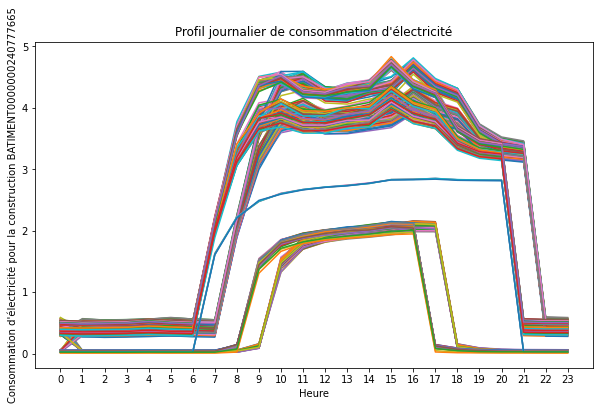

In [92]:
from helpers.showGraphic import show_graphic_for_building_day_profil

show_graphic_for_building_day_profil(df_profil_day, building_id)

## Représentation graphique des profils journaliers pour le bureau étudié pour chaque jour de la semaine sur une année

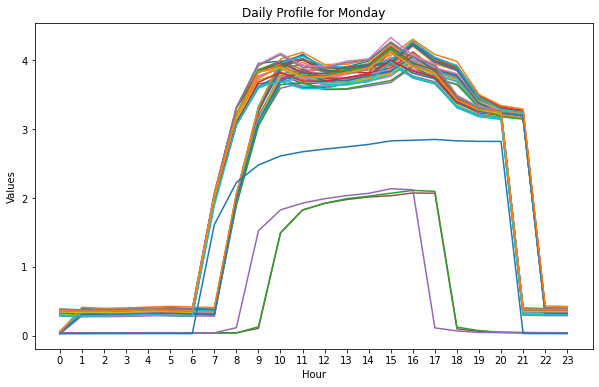

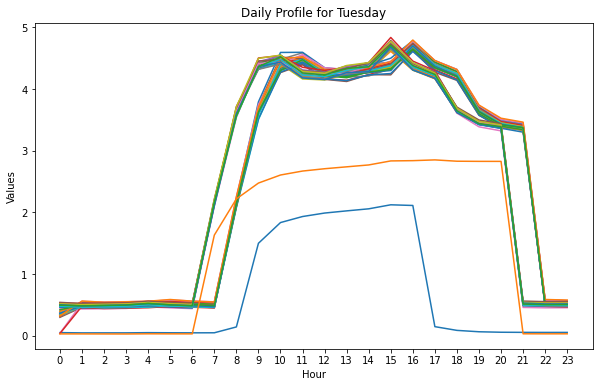

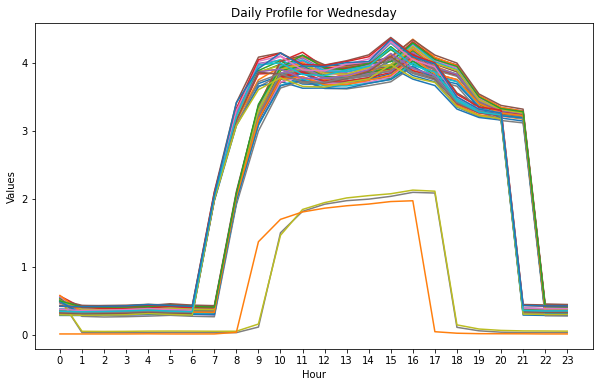

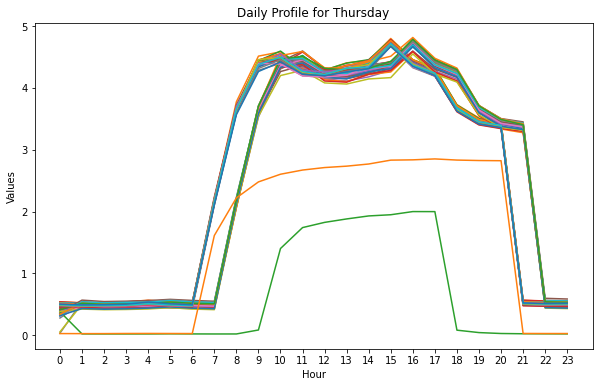

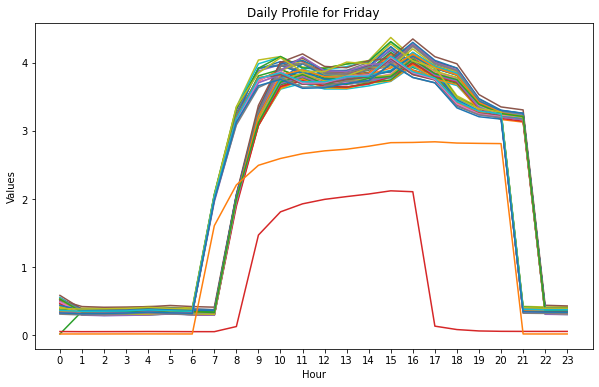

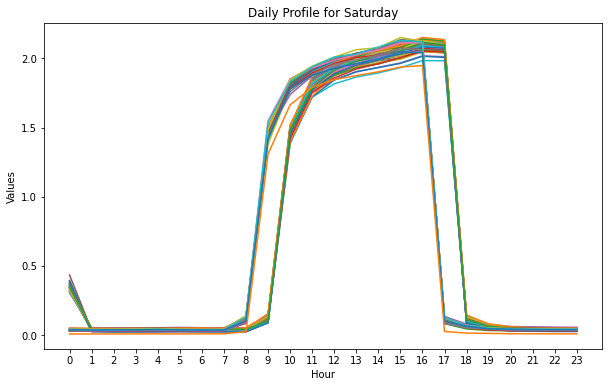

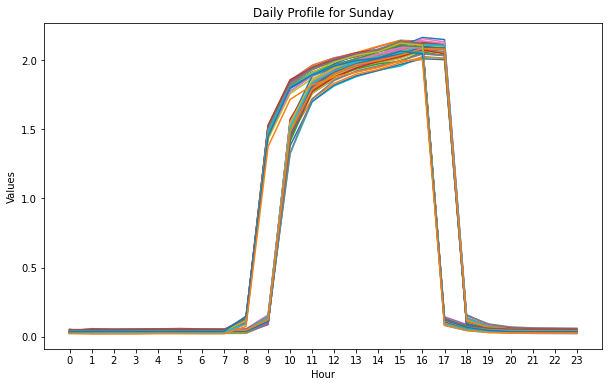

In [93]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_daily_profile(df, day):
    # Check if the requested day is present in the DataFrame index
    if day not in df.index.day_name():
        print(f"The day {day} is not present in the DataFrame.")
        return

    # Select data for the specific day
    daily_data = df[df.index.day_name() == day]

    # Create a plot
    plt.figure(figsize=(10, 6))

    # Use a loop to plot each line (day) separately
    for i in range(len(daily_data)):
        plt.plot(range(24), daily_data.iloc[i], label=f"{day} - line {i + 1}")

    # Add titles and labels
    plt.title(f"Daily Profile for {day}")
    plt.xlabel("Hour")
    plt.ylabel("Values")
    plt.xticks(range(24))
    # plt.legend()
    plt.show()


df_profil_day_original.index = pd.to_datetime(df_profil_day_original.index)
days_of_week = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

for day in days_of_week:
    plot_daily_profile(df_profil_day_original, day)

In [94]:
# df_profil_day_original= df_profil_day.copy()
df_profil_day.reset_index(drop=True, inplace=True)


# Calcul du nombre des clusters 
Pour le calcul du nombre des clusters nous allons utiliser La méthode du coude (elbow method).

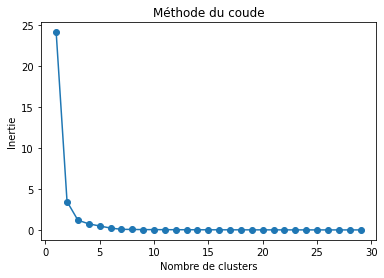

In [95]:
from matplotlib import pyplot as plt
from tslearn.clustering import TimeSeriesKMeans


def calcul_clusters_number_tslearn(X):
    inertia = []
    nb_maximal = 30

    for k in range(1, nb_maximal):
        km = TimeSeriesKMeans(
            n_clusters=k, metric="euclidean", max_iter=5, random_state=0
        )
        kmeans = km.fit(X)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, nb_maximal), inertia, marker="o")
    plt.title("Méthode du coude")
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Inertie")

    plt.show()


calcul_clusters_number_tslearn(df_profil_day_original)

## tslearn et TimeseriesKMeans


"tslearn" est une bibliothèque Python dédiée à l'apprentissage automatique sur des séries temporelles (time series). Elle offre des outils et des modèles spécifiquement conçus pour traiter les données séquentielles, ce qui est particulièrement utile dans des domaines tels que la reconnaissance de formes temporelles, la classification de séries temporelles, la prédiction de séries temporelles, etc.

Quelques caractéristiques clés de tslearn incluent :

    Compatibilité avec scikit-learn : tslearn est intégrée avec l'écosystème scikit-learn, ce qui signifie que vous pouvez l'utiliser de manière transparente avec d'autres bibliothèques populaires d'apprentissage automatique en Python.

    Modèles spécifiques pour les séries temporelles : Elle propose des modèles spécifiques aux séries temporelles tels que les réseaux de neurones récurrents (RNN), les k-plus proches voisins pour séries temporelles, les forêts aléatoires pour séries temporelles, etc.


La méthode TimeSeriesKMeans de tslearn est spécifiquement conçue pour le clustering de séries temporelles. Voici quelques avantages de l'utiliser pour le clustering de données temporelles :

    Considération de la nature séquentielle : Contrairement à des méthodes de clustering traditionnelles, TimeSeriesKMeans prend en compte la structure séquentielle des données temporelles. Elle mesure les similarités entre les séquences temporelles en prenant en considération l'ordre et les motifs temporels.

    Invariance par rapport à la translation et la dilatation temporelle : La méthode est conçue pour être invariante par rapport aux translations temporelles et aux dilatations, ce qui signifie qu'elle peut identifier des motifs similaires même si les séquences temporelles ont des décalages ou des changements d'échelle.

    Utilisation de métriques spécifiques aux séries temporelles : TimeSeriesKMeans utilise des métriques de similarité spécifiques aux séries temporelles pour mesurer la distance entre les séquences. Cela permet une meilleure adéquation aux caractéristiques temporelles des données.

    Intégration avec tslearn : Comme elle est intégrée avec tslearn, elle peut être utilisée de manière cohérente avec d'autres fonctionnalités de la bibliothèque, facilitant ainsi le prétraitement, l'évaluation et la visualisation des résultats.

    Optimisation pour les données temporelles : TimeSeriesKMeans est conçue pour tirer parti des spécificités des données temporelles, ce qui peut conduire à des résultats plus pertinents pour ce type de données par rapport à des méthodes de clustering génériques.

    Gestion des problèmes de dimension : Elle offre des méthodes pour gérer efficacement la dimension temporelle, qui peut varier d'une série à l'autre, en utilisant des méthodes de resampling.

    Flexibilité dans le choix des métriques et des mécanismes de clustering : La méthode permet de spécifier différentes métriques de distance et de choisir entre différents mécanismes de clustering, ce qui offre une certaine flexibilité pour adapter l'algorithme aux caractéristiques spécifiques de vos données.


Après avoir analysé la méthode du coude, il est déterminé que le nombre optimal de clusters est 3. Par la suite, nous appliquerons l'algorithme TimeSeriesKMeans en utilisant trois métriques différentes.

1. metric="euclidean"
2. metric="dtw"
3. metric="softdtw"

Ces trois métriques "euclidean", "dtw" (Dynamic Time Warping), et "softdtw" (Soft Dynamic Time Warping), sont utilisées dans le contexte de la mesure de la similarité ou de la distance entre des séries temporelles.

Explications :
    Euclidean (euclidienne) :
        Description : C'est la métrique euclidienne classique qui mesure la distance directe entre deux points dans un espace euclidien.
        Application : Elle est souvent utilisée lorsque la forme globale des courbes est importante et que les séries temporelles ont des valeurs comparables.

    DTW (Dynamic Time Warping) :
        Description : Le DTW est une méthode qui mesure la dissimilarité entre deux séries temporelles en trouvant la meilleure correspondance entre leurs points, même si elles ont des échelles temporelles différentes ou des déformations dans le temps.
        Application : Utile lorsque la synchronisation temporelle n'est pas constante entre les séries temporelles, ce qui est fréquent dans les domaines tels que la reconnaissance de la parole ou l'analyse de séquences temporelles.

    SoftDTW (Soft Dynamic Time Warping) :
        Description : Une version "adoucie" du DTW qui introduit une pénalité continue pour les déformations temporelles. Cela rend la métrique différentiable, ce qui la rend plus adaptée à des applications où la différenciation est importante.
        Application : Souvent utilisée dans des contextes d'apprentissage automatique, en particulier pour les tâches nécessitant des gradients tels que l'optimisation de modèles.

In [96]:
nb_clusters = 3
km_euclidean = TimeSeriesKMeans(
    n_clusters=nb_clusters, metric="euclidean", max_iter=50, random_state=0
)
model = km_euclidean.fit(df_profil_day)
y_pred = km_euclidean.fit_predict(df_profil_day)


dba_km = TimeSeriesKMeans(
    n_clusters=nb_clusters,
    n_init=2,
    metric="dtw",
    verbose=True,
    max_iter_barycenter=20,
    random_state=0,
)
model_dtw = dba_km.fit(df_profil_day)
y_pred_dtw = dba_km.fit_predict(df_profil_day)

sdtw_km = TimeSeriesKMeans(
    n_clusters=nb_clusters,
    metric="softdtw",
    metric_params={"gamma": 0.03},
    verbose=True,
    random_state=0,
)
model_sdtw = sdtw_km.fit(df_profil_day)
y_pred_sdtw = sdtw_km.fit_predict(df_profil_day)

Init 1


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.350 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.125 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.125 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.125 --> 
Init 2


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.227 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.126 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.125 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.125 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Init 1


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.350 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.125 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.125 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.125 --> 
Init 2


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.227 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.126 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.125 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.125 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.535 --> 0.493 --> 0.498 --> 0.498 --> 0.498 --> 0.498 --> 0.498 --> 0.498 --> 0.498 --> 0.498 --> 
0.535 --> 0.493 --> 0.498 --> 0.498 --> 0.498 --> 0.498 --> 0.498 --> 0.498 --> 0.498 --> 0.498 --> 


## Affichage des resultats de clustering

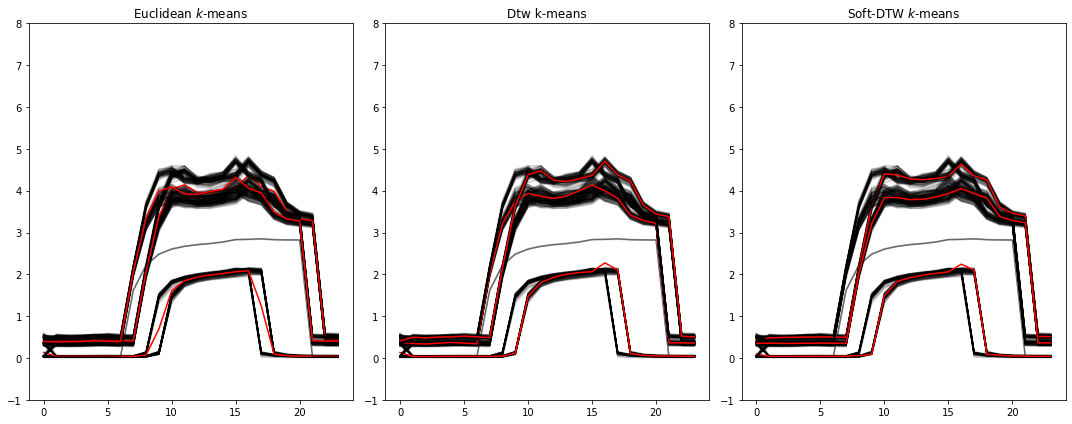

In [97]:
import matplotlib.pyplot as plt


def show_tslearn_clusters(df_profil_day, y_pred, title, km, nb_clusters):
    plt.figure(figsize=(15, 6))

    for i, (y_pred, km, title) in enumerate(
        zip(
            [y_pred, y_pred_dtw, y_pred_sdtw],
            [km_euclidean, dba_km, sdtw_km],
            ["Euclidean $k$-means", "Dtw k-means", "Soft-DTW $k$-means"],
        )
    ):
        plt.subplot(1, 3, i + 1)
        for yi in range(nb_clusters):
            plt.plot(df_profil_day.iloc[y_pred == yi].values.T, "k-", alpha=0.2)
            plt.plot(km.cluster_centers_[yi], "r-")
            plt.ylim(-1, 8)
            # plt.text(0.55, 0.85, "Cluster %d" % (yi + 1), transform=plt.gca().transAxes)
            if yi == 0:
                plt.title(title)

    plt.tight_layout()
    plt.show()


# Utilisation
show_tslearn_clusters(
    df_profil_day, y_pred, "Clustering Results", km_euclidean, nb_clusters
)

In [98]:
def show_tslearn_clusters(df_profil_day, y_pred, title, km, nb_clusters):
    plt.figure()
    # fig, axs = plt.subplots(nb_clusters, 1, figsize=(10, 6 * nb_clusters))
    for yi in range(nb_clusters):
        plt.subplot(nb_clusters, nb_clusters, yi + 1)
        for index, xx in df_profil_day.iterrows():
            if y_pred[index] == yi:
                plt.plot(xx, "k-", alpha=0.2)
        plt.plot(km.cluster_centers_[yi], "r-")
        plt.xlim(0, 40)
        plt.ylim(-1, 8)
        plt.text(0.55, 0.85, "Cluster %d" % (yi + 1), transform=plt.gca().transAxes)
        if yi == 1:
            plt.title(title)

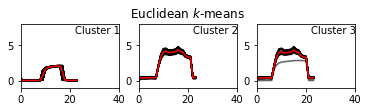

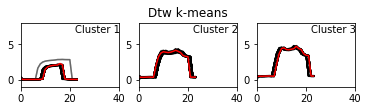

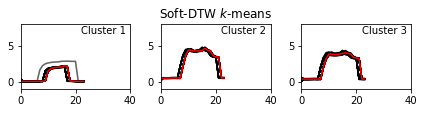

In [99]:
show_tslearn_clusters(
    df_profil_day, y_pred, "Euclidean $k$-means", km_euclidean, nb_clusters
)
show_tslearn_clusters(df_profil_day, y_pred_dtw, "Dtw k-means", dba_km, nb_clusters)

show_tslearn_clusters(
    df_profil_day, y_pred_sdtw, "Soft-DTW $k$-means", sdtw_km, nb_clusters
)
plt.tight_layout()
plt.show()

Le Score de silhouette
Cette méthode permet d'évaluer la qualité des clusters créés grâce aux algorithmes de clustering. Compris entre [-1,1], le score silhouette est parfois utilisé pour trouver la valeur optimale du nombre de clusters « k ». Pour ce faire, on considère la valeur de « k » ayant le score de silhouette le plus proche de 1.


In [100]:
from sklearn.metrics import silhouette_score

# Supposons que model.labels_, model_dtw.labels_, et model_sdtw.labels_ sont les étiquettes de vos clusters

silhouette_scores = {}

silhouette_scores["euclidean"] = silhouette_score(
    df_profil_day, model.labels_, metric="euclidean"
)
silhouette_scores["dtw"] = silhouette_score(
    df_profil_day, model_dtw.labels_, metric="euclidean"
)
silhouette_scores["sdtw"] = silhouette_score(
    df_profil_day, model_sdtw.labels_, metric="euclidean"
)

best_metric = max(silhouette_scores, key=silhouette_scores.get)

print(f"The metric with the highest silhouette score is: {best_metric}")
print(f"Silhouette Score: {silhouette_scores[best_metric]}")
print(
    "Silhouette Coefficient Euclidean: (between -1 and 1, better bigger) ",
    silhouette_score(df_profil_day, model.labels_),
)
print(
    "Silhouette Coefficient dtw: (between -1 and 1, better bigger) ",
    silhouette_score(df_profil_day, model_dtw.labels_),
)

print(
    "Silhouette Coefficient sdtw : (between -1 and 1, better bigger) ",
    silhouette_score(df_profil_day, model_sdtw.labels_),
)

The metric with the highest silhouette score is: euclidean
Silhouette Score: 0.7624287290874984
Silhouette Coefficient Euclidean: (between -1 and 1, better bigger)  0.7624287290874984
Silhouette Coefficient dtw: (between -1 and 1, better bigger)  0.45096003450198685
Silhouette Coefficient sdtw : (between -1 and 1, better bigger)  0.45096003450198685


Le score le plus proche de 1 est celui de la clusterisation utilisant la métrique "euclidienne".
 Nous allons maintenant examiner de plus près les résultats de cette clusterisation.

## Création de DataFrames contenant les données originels et les clusters correspondants aux metrique "euclidienne"

In [101]:
df_profil_day_cluster = df_profil_day_original.copy()

if best_metric == "euclidean":
    df_profil_day_cluster.insert(0, "clusters", y_pred)
    model_optimal=model
    y_predict=y_pred
elif best_metric == "dtw":
    df_profil_day_cluster.insert(0, "clusters", y_pred_dtw)
    model_optimal=model_dtw
    y_predict=y_pred_dtw
elif best_metric == "sdtw":
    df_profil_day_cluster.insert(0, "clusters", y_pred_sdtw)
    model_optimal=model_sdtw
    y_predict=y_pred_sdtw

# df_profil_day_euclidean.insert(0, "clusters", y_pred)
df_profil_day_cluster

,clusters,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
2019-01-01,0,0.051205,0.047232,0.047482,0.047517,0.050697,0.048953,0.047959,0.048649,0.143458,...,2.057848,2.123015,2.11206,0.147952,0.087548,0.065158,0.057404,0.055473,0.05451,0.054619
2019-01-02,2,0.324805,0.319113,0.321784,0.322277,0.338286,0.331128,0.322116,2.010638,3.190806,...,3.780604,4.041302,3.812993,3.719025,3.352483,3.221804,3.188785,0.327762,0.326,0.327858
2019-01-03,2,0.49037,0.478599,0.485637,0.494218,0.511541,0.49472,0.485085,2.165099,3.639162,...,4.335125,4.716515,4.38024,4.24796,3.659355,3.438164,3.377256,0.508835,0.498072,0.500288
2019-01-04,2,0.352068,0.337039,0.342835,0.351214,0.36492,0.35042,0.342248,2.029697,3.260243,...,3.93718,4.181232,3.961475,3.858733,3.431043,3.271061,3.234214,0.37215,0.362755,0.363481
2019-01-05,0,0.044422,0.043594,0.044735,0.045023,0.046484,0.045081,0.043865,0.043817,0.131058,...,2.061143,2.130489,2.108557,0.116543,0.06985,0.053144,0.04611,0.044329,0.044202,0.044468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2,0.022067,0.022174,0.022222,0.022779,0.022894,0.0225,0.022089,1.60959,2.207257,...,2.774434,2.826614,2.829934,2.839436,2.821119,2.816504,2.812949,0.022285,0.022065,0.022067
2019-12-28,0,0.007929,0.007467,0.00773,0.007926,0.008416,0.007724,0.008412,0.008667,0.023985,...,1.903386,1.937709,1.948091,0.025717,0.013745,0.011776,0.009291,0.009013,0.008328,0.008158
2019-12-29,0,0.023599,0.021457,0.021423,0.021216,0.023871,0.023055,0.022749,0.022807,0.075144,...,1.946294,1.993634,2.002588,0.084288,0.047498,0.031641,0.028539,0.028284,0.027015,0.02642
2019-12-30,2,0.364904,0.353678,0.356368,0.360222,0.380445,0.36267,0.357199,2.036041,3.19856,...,3.894669,4.121766,3.915049,3.817331,3.424479,3.287368,3.248991,0.383108,0.376061,0.376711


## Distribution des profils journalieres par cluster

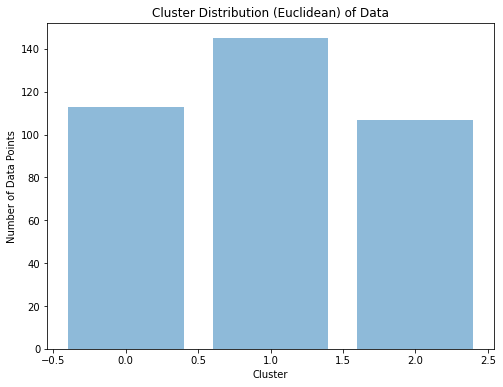

In [102]:
import pandas as pd
import matplotlib.pyplot as plt


# Function to create a bar plot for cluster distribution
def plot_cluster_distribution(df, cluster_column, title):
    # Create a DataFrame with the counts of data points in each cluster
    cluster_counts = df[cluster_column].value_counts().sort_index()

    # Create a bar plot to visualize the distribution of data points across clusters
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.bar(cluster_counts.index, cluster_counts, align="center", alpha=0.5)

    # Set axis labels and plot title
    plt.xlabel("Cluster")
    plt.ylabel("Number of Data Points")
    plt.title(title)

    # Display the plot
    plt.show()


# Plot the cluster distribution for Euclidean metric
plot_cluster_distribution(
    df_profil_day_cluster, "clusters", "Cluster Distribution (Euclidean) of Data"
)

## Distribution des jours appartenant au même cluster selon le jour de la semaine

euclidean
   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0     1.0     3.0      52.0    52.0       1.0      1.0        3.0
1    30.0    28.0       0.0     0.0      29.0     30.0       28.0
2    21.0    21.0       0.0     0.0      22.0     22.0       21.0


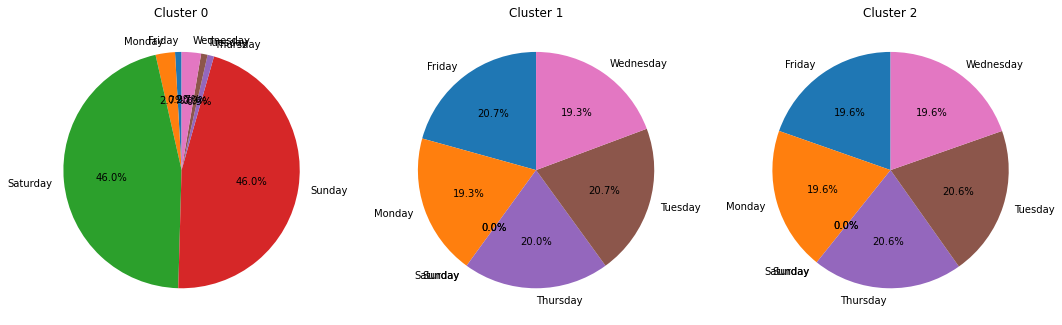

In [103]:
import pandas as pd
import matplotlib.pyplot as plt


def process_cluster_data(df, cluster_column, message):
    # Import the DataFrame
    # df = globals()[df_name]

    # Convert the index to datetime
    df.index = pd.to_datetime(df.index)

    # Determine the appropriate column for grouping:
    grouped_df = df.groupby("clusters")


    # Initialize a dictionary to store the results
    results = {}

    # Loop through each group
    for name, group in grouped_df:
        # Count the occurrences of each day of the week in the group
        day_counts = group.index.day_name().value_counts()

        # Store the results in the dictionary
        results[name] = day_counts

    # Create a DataFrame from the dictionary
    result_df = pd.DataFrame(results).T.fillna(0)

    # Display the resulting DataFrame with the specified message
    print(message)
    print(result_df)

    # Create subplots with a single row for each cluster
    fig, axs = plt.subplots(1, result_df.shape[0], figsize=(6 * result_df.shape[0], 6))

    for i, (cluster, row) in enumerate(result_df.iterrows()):
        axs[i].pie(row, labels=row.index, autopct="%1.1f%%", startangle=90)
        axs[i].set_title(f"Cluster {cluster}")

    plt.show()


# Appeler la fonction pour chaque DataFrame avec le message approprié
process_cluster_data(df_profil_day_cluster, "clusters", best_metric)


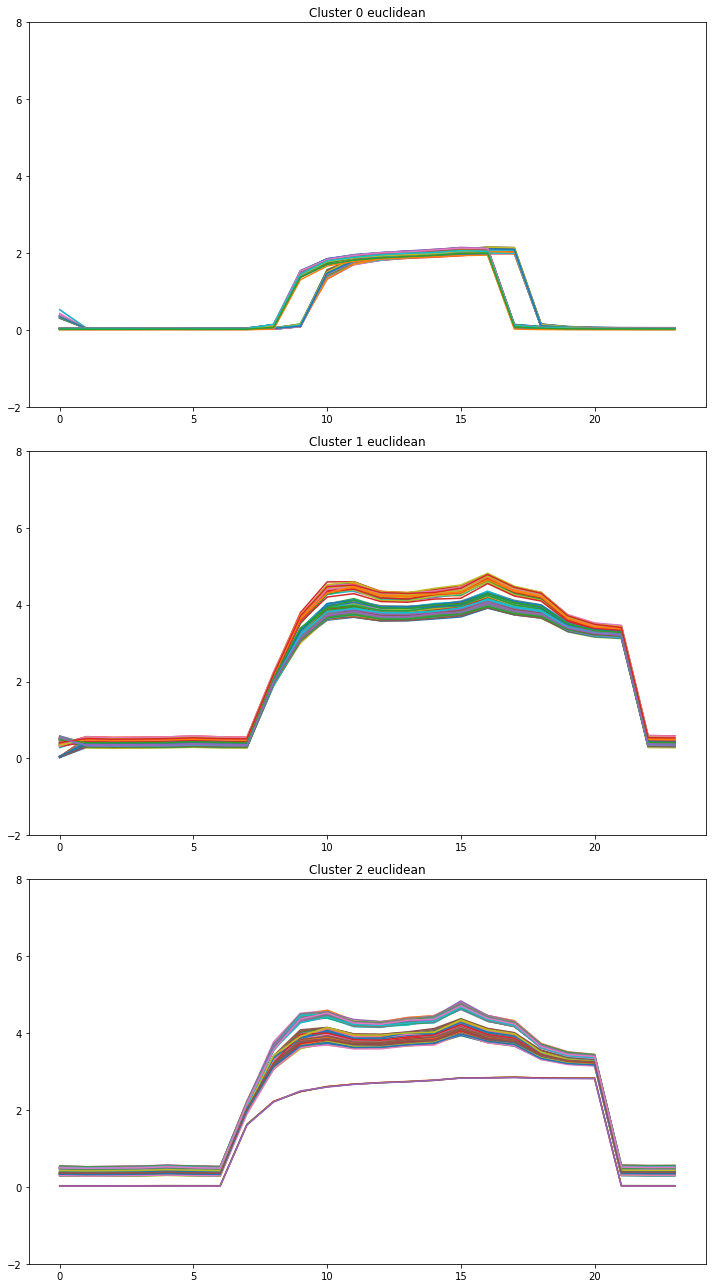

In [104]:
def show_clusters_comparison(df_profil_day, y_pred_list, title_list, nb_clusters):
    fig, axs = plt.subplots(
        nb_clusters,1 , figsize=(10, 6 * nb_clusters)
    )

    for i in range(nb_clusters):
        for j, y_pred in enumerate(y_pred_list):
                ax = axs[i]
                for ind, el in enumerate(y_pred):
                    if el == i:
                        ax.plot(df_profil_day.iloc[ind])
                ax.set_ylim(-2, 8)
                ax.set_title(f"Cluster {i} {title_list[j]}")

    plt.tight_layout()
    plt.show()


show_clusters_comparison(
    df_profil_day,
    [y_predict],
    [best_metric],
    nb_clusters,
)

## Réduction de dimension et representation graphique

L'algorithme t-SNE (t-distributed stochastic neighbor embedding) est une technique de réduction de dimension pour la visualisation de données développée par Geoffrey Hinton et Laurens van der Maaten et publiée en 2008. 

Il s'agit d'une méthode non linéaire permettant de représenter un ensemble de points d'un espace à grande dimension dans un espace de deux ou trois dimensions. Les données peuvent ensuite être visualisées sous la forme d'un nuage de points. L'algorithme t-SNE tente de trouver une configuration optimale selon un critère de théorie de l'information afin de conserver la proximité entre les points pendant la transformation : deux points qui sont proches (resp. éloignés) dans l'espace d'origine doivent être proches (resp. éloignés) dans l'espace de faible dimension. 

L'algorithme t-SNE se base sur une interprétation probabiliste des proximités. Une distribution de probabilité est définie sur les paires de points de l'espace d'origine de telle sorte que des points proches l'un de l'autre ont une forte probabilité d'être choisis tandis que des points éloignés ont une faible probabilité d'être sélectionnés. Une distribution de probabilité est également définie de la même manière pour l'espace de visualisation. L'algorithme t-SNE consiste à faire concorder les deux densités de probabilité, en minimisant la divergence de Kullback-Leibler entre les deux distributions par rapport à l'emplacement des points sur la carte.

L'algorithme t-SNE a été utilisée pour de nombreuses applications : analyse de la musique, recherche sur le cancer, bioinformatique, et le traitement de signaux biomédicaux5. Cette méthode est souvent utilisée pour la visualisation de représentations de haut-niveau apprises par un réseau de neurones artificiel. 


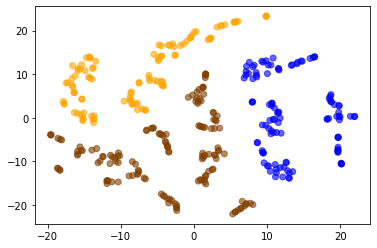

In [113]:
from sklearn.manifold import TSNE
import matplotlib.colors
import matplotlib.pyplot as plt


def plot_tsne_scatter(df, df_with_clusters, model, cluster_column, color_list):
    # Initialize t-SNE and fit_transform the data
    tsne = TSNE(
        n_components=2,
        init="pca",
        random_state=10,
        perplexity=5,
        n_iter=300,
    )
    results_tsne = tsne.fit_transform(df)

    # Create a colormap using cluster_values and color_list
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        "custom_cmap", color_list
    )

    # Scatter plot with t-SNE results
    plt.scatter(
        results_tsne[:, 0],
        results_tsne[:, 1],
        c=df_with_clusters[cluster_column],
        cmap=cmap,
        alpha=0.6,
    )

    # Show the plot
    plt.show()


# Example usage for df_profil_day
color_list_example = ["blue", "green", "red", "orange"]


plot_tsne_scatter(
    df_profil_day, df_profil_day_cluster, model_optimal, "clusters", color_list_example
)

In [106]:
df_profil_day_cluster

,clusters,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
2019-01-01,0,0.051205,0.047232,0.047482,0.047517,0.050697,0.048953,0.047959,0.048649,0.143458,...,2.057848,2.123015,2.11206,0.147952,0.087548,0.065158,0.057404,0.055473,0.05451,0.054619
2019-01-02,2,0.324805,0.319113,0.321784,0.322277,0.338286,0.331128,0.322116,2.010638,3.190806,...,3.780604,4.041302,3.812993,3.719025,3.352483,3.221804,3.188785,0.327762,0.326,0.327858
2019-01-03,2,0.49037,0.478599,0.485637,0.494218,0.511541,0.49472,0.485085,2.165099,3.639162,...,4.335125,4.716515,4.38024,4.24796,3.659355,3.438164,3.377256,0.508835,0.498072,0.500288
2019-01-04,2,0.352068,0.337039,0.342835,0.351214,0.36492,0.35042,0.342248,2.029697,3.260243,...,3.93718,4.181232,3.961475,3.858733,3.431043,3.271061,3.234214,0.37215,0.362755,0.363481
2019-01-05,0,0.044422,0.043594,0.044735,0.045023,0.046484,0.045081,0.043865,0.043817,0.131058,...,2.061143,2.130489,2.108557,0.116543,0.06985,0.053144,0.04611,0.044329,0.044202,0.044468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2,0.022067,0.022174,0.022222,0.022779,0.022894,0.0225,0.022089,1.60959,2.207257,...,2.774434,2.826614,2.829934,2.839436,2.821119,2.816504,2.812949,0.022285,0.022065,0.022067
2019-12-28,0,0.007929,0.007467,0.00773,0.007926,0.008416,0.007724,0.008412,0.008667,0.023985,...,1.903386,1.937709,1.948091,0.025717,0.013745,0.011776,0.009291,0.009013,0.008328,0.008158
2019-12-29,0,0.023599,0.021457,0.021423,0.021216,0.023871,0.023055,0.022749,0.022807,0.075144,...,1.946294,1.993634,2.002588,0.084288,0.047498,0.031641,0.028539,0.028284,0.027015,0.02642
2019-12-30,2,0.364904,0.353678,0.356368,0.360222,0.380445,0.36267,0.357199,2.036041,3.19856,...,3.894669,4.121766,3.915049,3.817331,3.424479,3.287368,3.248991,0.383108,0.376061,0.376711


In [107]:
grouped_clusters = df_profil_day_cluster.groupby("clusters")
dfs_cluster = {cluster: group for cluster, group in grouped_clusters}

index_clusters = {}
for cluster, df_cluster in dfs_cluster.items():
    print(f"Index of DataFrame for Cluster {cluster}: {df_cluster.index.tolist()}")
    index_clusters[cluster] = df_cluster.index.tolist()

Index of DataFrame for Cluster 0: [Timestamp('2019-01-01 00:00:00'), Timestamp('2019-01-05 00:00:00'), Timestamp('2019-01-06 00:00:00'), Timestamp('2019-01-12 00:00:00'), Timestamp('2019-01-13 00:00:00'), Timestamp('2019-01-19 00:00:00'), Timestamp('2019-01-20 00:00:00'), Timestamp('2019-01-26 00:00:00'), Timestamp('2019-01-27 00:00:00'), Timestamp('2019-02-02 00:00:00'), Timestamp('2019-02-03 00:00:00'), Timestamp('2019-02-09 00:00:00'), Timestamp('2019-02-10 00:00:00'), Timestamp('2019-02-16 00:00:00'), Timestamp('2019-02-17 00:00:00'), Timestamp('2019-02-23 00:00:00'), Timestamp('2019-02-24 00:00:00'), Timestamp('2019-03-02 00:00:00'), Timestamp('2019-03-03 00:00:00'), Timestamp('2019-03-09 00:00:00'), Timestamp('2019-03-10 00:00:00'), Timestamp('2019-03-16 00:00:00'), Timestamp('2019-03-17 00:00:00'), Timestamp('2019-03-23 00:00:00'), Timestamp('2019-03-24 00:00:00'), Timestamp('2019-03-30 00:00:00'), Timestamp('2019-03-31 00:00:00'), Timestamp('2019-04-06 00:00:00'), Timestamp('20

In [108]:
import pandas as pd


def convert_to_days_of_week(timestamps):
    # Convertir les Timestamps en objets Pandas Timestamp
    timestamps_pd = pd.to_datetime(timestamps)

    # Extraire les noms des jours de la semaine
    days_of_week = timestamps_pd.day_name()

    return days_of_week.tolist()


result = {}
for cluster, index_list_for_clust in index_clusters.items():
    result[cluster] = convert_to_days_of_week(index_clusters[cluster])
    print(f"Cluster {cluster}: {result[cluster]}")


Cluster 0: ['Tuesday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Monday', 'Saturday', 'Sunday', 'Wednesday', 'Saturday', 'Sunday', 'Wednesday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Monday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Thursday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sunday', 'Saturday', 'Sund

Interpretation des resultats pour le clustering avec le metric euclideen

Cluster 0 :

    Ce cluster est caractérisé par une forte concentration de jours de consommation le samedi et le dimanche.
    Dans le tableau, on observe que pour le premier ensemble de données (cluster 0), il y a 52 occurrences le samedi, 52 occurrences le dimanche, et une occurrence le vendredi, le lundi, le mardi, le mercredi et le jeudi.

Cluster 1 :

    Ce cluster présente une distribution plus uniforme des jours de consommation, avec une prédominance le vendredi, le lundi et le mardi.
    Pour le deuxième ensemble de données (cluster 1), on observe 30 occurrences le vendredi, 28 occurrences le lundi, le mardi, et le mercredi, et 29 occurrences le jeudi.

Cluster 2 :

    Ce cluster est également caractérisé par une  concentration de jours de consommation le vendredi, le lundi, le mardi, et le mercredi.
    Pour le troisième ensemble de données (cluster 2), on observe 21 occurrences le vendredi, le lundi, le mardi et le mercredi, et 22 occurrences le jeudi.

Ces résultats suggèrent que les clusters ont été formés en regroupant les jours de consommation d'électricité en fonction de leurs similitudes. Chaque cluster représente un motif distinct de consommation sur les jours de la semaine, avec des concentrations différentes selon le cluster.


Cluster 0 - Forte concentration le samedi et le dimanche :

    Absence d'Activités : Le week-end, les bureaux sont généralement fermés, ce qui entraîne une baisse significative de la consommation d'électricité. Les équipements non essentiels sont éteints, contribuant à une faible consommation.

Cluster 1 et cluster 2 : Jours Ouvrables Classiques :

 La répartition relativement uniforme en semaine suggère une utilisation régulière des équipements de bureau pendant les heures de travail normales. La repartition peut être influencée par des pratiques de télétravail fréquentes ce jour-là, où les employés travaillant à domicile maintiennent une consommation d'énergie similaire à celle du bureau. 
 Ces resultats peuvent être attribuée à une combinaison d'activités au bureau et de télétravail. Certains employés peuvent choisir de travailler à domicile le vendredi, influençant ainsi la consommation électrique à la fois au bureau et chez eux.


Facteurs Généraux :
    Flexibilité du Télétravail : Les politiques de télétravail flexibles peuvent entraîner des variations dans les motifs de consommation, avec des jours de consommation plus élevée au bureau et à domicile.

    Politiques d'Économie d'Énergie : Des politiques d'économie d'énergie, comme l'extinction automatique des lumières et des équipements non essentiels en dehors des heures de travail, peuvent influencer les motifs de consommation.

    Équipements de Bureau : Certains équipements de bureau, tels que les ordinateurs, les imprimantes, et l'éclairage, peuvent contribuer de manière significative à la consommation d'électricité. Des cycles réguliers d'utilisation de ces équipements peuvent influencer les motifs.